### Analysis in Medicare Provider Utilization and Payment Data: Statistical Inference

#### Data Source: https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Physician-and-Other-Supplier.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("medical_insurance.csv")
data_ca = data.loc[data['State Code of the Provider']=='CA']
data_ca_drop = data_ca.drop(['Middle Initial of the Provider', 'National Provider Identifier','First Name of the Provider','Credentials of the Provider','Street Address 2 of the Provider','State Code of the Provider','Country Code of the Provider'], axis=1)
data_ca_drop['Average Medicare Difference'] = data_ca_drop['Average Submitted Charge Amount']- data_ca_drop['Average Medicare Allowed Amount'] 
provider_list = ['Thoracic Surgery','Neurosurgery','Cardiac Surgery', 'Vascular Surgery', 'CRNA']
data_ca_drop_pro = data_ca_drop.loc[data_ca_drop['Provider Type'].isin(provider_list)]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
# see information of data
data_ca_drop_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11475 entries, 286 to 9497733
Data columns (total 20 columns):
Last Name/Organization Name of the Provider                 11475 non-null object
Gender of the Provider                                      11475 non-null object
Entity Type of the Provider                                 11475 non-null object
Street Address 1 of the Provider                            11475 non-null object
City of the Provider                                        11475 non-null object
Zip Code of the Provider                                    11475 non-null object
Provider Type                                               11475 non-null object
Medicare Participation Indicator                            11475 non-null object
Place of Service                                            11475 non-null object
HCPCS Code                                                  11475 non-null object
HCPCS Description                                           11475 n

In [13]:
data_ca_drop_pro.isnull().sum()

Last Name/Organization Name of the Provider                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average 

In [15]:
data_ca_drop_pro['HCPCS Drug Indicator'].describe()

count     11475
unique        2
top           N
freq      11415
Name: HCPCS Drug Indicator, dtype: object

In 2014, none of the provider furnishing the HCPCS code for the specific service in the California are listed on the Medicare Part B Drug Average Sales Price.

In [14]:
data_ca_drop_pro['Gender of the Provider'].describe()

count     11475
unique        2
top           M
freq      10198
Name: Gender of the Provider, dtype: object

## Box Plot

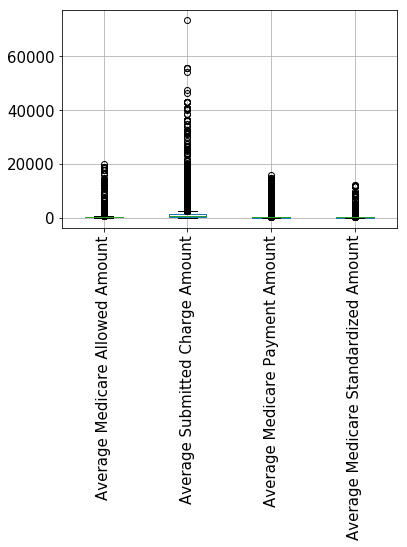

In [4]:
boxplot = data_ca_drop_pro.boxplot(column=['Average Medicare Allowed Amount','Average Submitted Charge Amount','Average Medicare Payment Amount','Average Medicare Standardized Amount'], rot=90, fontsize=15)

We can see that there are a lot outliers in each numerical variables, yet there might be some medical meaning for these outliers, for example, maybe certain types of procedures would be very expensive. Thus we are not removing these outliers at this point. 

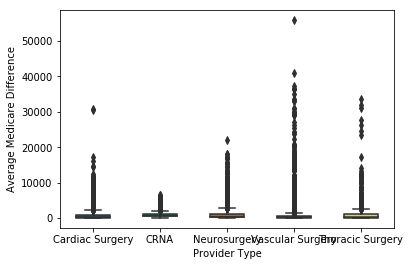

In [5]:
bplot = sns.boxplot(y='Average Medicare Difference', x='Provider Type', 
                 data=data_ca_drop_pro, 
                 width=0.5,
                 palette="colorblind")


Again, We can see that there are a lot outliers in each procedure, yet there might be some medical meaning for these outliers, Thus we are not removing these outliers at this point.

### Correlation Matrix

To investigate what factors would contribute to major impact on the dependent variable - average medicare difference, and understand if independent variables have correlations, correlation matrix is applied.

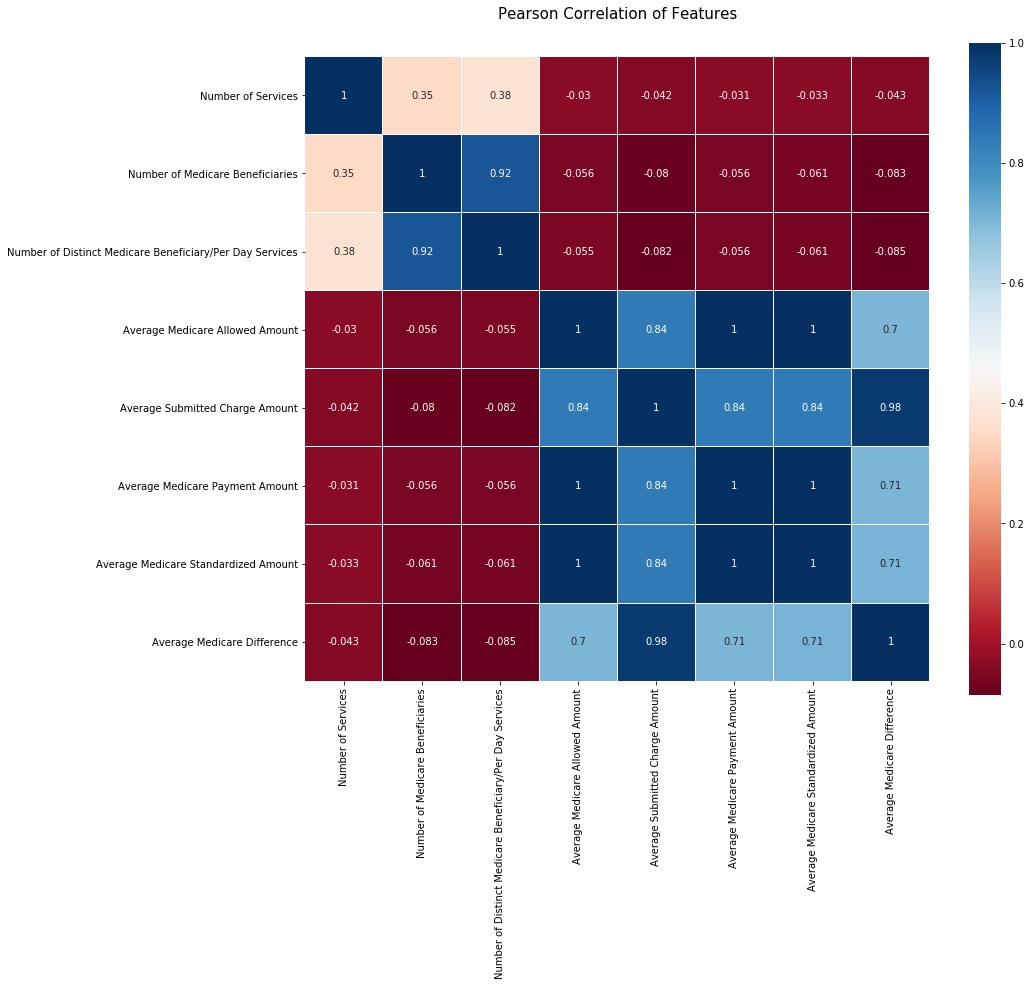

In [6]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_ca_drop_pro.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig("corrmatirx.png")

We can see that Average Medicare Allowed Amount, Average Submitted Charge Amount, Average Medicare Payment Amount,and Average Medicare Standardized Amount have higher correlation with Average Medicare Difference. We will focus on visualizing these features.

In [19]:
import statsmodels.api as sm
lr = sm.OLS(data_ca_drop_pro["Average Medicare Difference"], data_ca_drop_pro[['Average Medicare Allowed Amount','Average Medicare Payment Amount', 'Average Medicare Standardized Amount','Average Submitted Charge Amount']])
lr_result = lr.fit()
display(lr_result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Average Medicare Difference   R-squared:                       1.000
Model:                                     OLS   Adj. R-squared:                  1.000
Method:                          Least Squares   F-statistic:                 8.390e+32
Date:                         Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                                 20:41:28   Log-Likelihood:             2.8183e+05
No. Observations:                        11475   AIC:                        -5.637e+05
Df Residuals:                            11471   BIC:                        -5.636e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Average Medicare Allowed Amount         -1.0000   1.92e-15   -5.2e+14      0.000      -1.000      -1.000
Average Medicare Payment Amount       4.885e-14   2.39e-15     20.432      0.000    4.42e-14    5.35e-14
Average Medicare Standardized Amount -1.776e-15    7.9e-16     -2.248      0.025   -3.33e-15   -2.27e-16
Average Submitted Charge Amount          1.0000   2.63e-17   3.81e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    19129.088   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15749775.393
Skew:                          11.330   Prob(JB):                         0.00
Kurtosis:                     183.076   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the t-test, the result showed that all the features have significant impact on the dependent variable - Average Medicare Difference. Yet the Adjusted R-Squared showed that the model might be overfitted. More regularization should be done to solve th issue. 